In [2]:
#logic-based method using composition of perceptron-like gates
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logic_gate(w1, w2, b):
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print(f"{a},{b}: {np.round(gate(a, b))}")

or_gate = logic_gate(20, 20, -10)
and_gate = logic_gate(15, 15, -20)
nand_gate = logic_gate(-20, -20, 30)

def XOR_gate(x1, x2):
    or_out = or_gate(x1, x2)
    nand_out = nand_gate(x1, x2)
    return and_gate(or_out, nand_out)

test(XOR_gate)


0,0: 0.0
0,1: 1.0
1,0: 1.0
1,1: 0.0


Epoch 0 Loss: 0.3223
Epoch 3000 Loss: 0.0016
Epoch 6000 Loss: 0.0007
Epoch 9000 Loss: 0.0004
Epoch 12000 Loss: 0.0003
Epoch 15000 Loss: 0.0002
Epoch 18000 Loss: 0.0002

Predictions:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


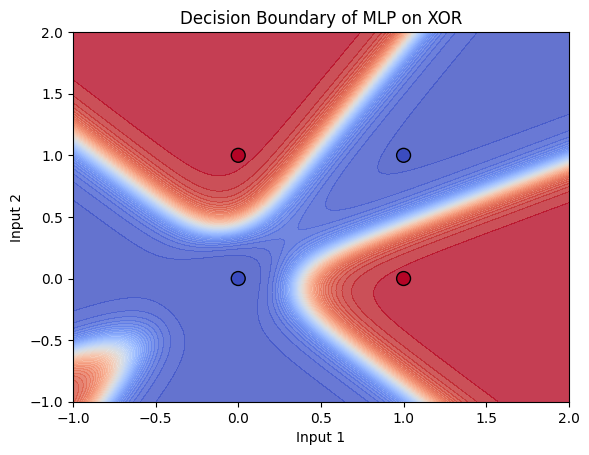

In [8]:
#trained Multi-Layer Perceptron (MLP) that solves the XOR problem using gradient descent and sigmoid activation
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1 - np.power(x, 2)

# XOR data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
input_size = 2
hidden_size = 4
output_size = 1
lr = 0.1
epochs = 20000

# Initialize weights and biases
np.random.seed(42)
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, w2) + b2
    output = sigmoid(z2)

    # Backprop
    loss = y - output
    d_output = loss * sigmoid_deriv(output)

    error_hidden = d_output.dot(w2.T)
    d_hidden = error_hidden * tanh_deriv(a1)

    # Weight updates
    w2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    w1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if epoch % 3000 == 0:
        print(f"Epoch {epoch} Loss: {np.mean(np.square(loss)):.4f}")

# Predictions
print("\nPredictions:")
for i in range(4):
    z1 = np.dot(X[i], w1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, w2) + b2
    o = sigmoid(z2)
    pred = round(o.item())   # extract scalar and round to 0 or 1
    print(f"{X[i]} -> {pred}")


# Decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 2, 300), np.linspace(-1, 2, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
z1 = np.dot(grid, w1) + b1
a1 = tanh(z1)
z2 = np.dot(a1, w2) + b2
preds = sigmoid(z2).reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=50, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='coolwarm', edgecolors='k', s=100)
plt.title("Decision Boundary of MLP on XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


